In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data( num_words=10000)

Using TensorFlow backend.


In [2]:
word_index = reuters.get_word_index()

reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
translation = ' '.join([reverse_word_index.get(index-3,'?') for index in train_data[1]])
print(translation)

? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa ? factors generale de banque said in a statement it gave no financial details of the transaction sa ? ? turnover in 1986 was 17 5 billion belgian francs reuter 3


In [3]:
import numpy as np
def vectorize_sequences(sequences, dimensions=10000):
    result = np.zeros((len(sequences),dimensions))
    for index, sequence in enumerate(sequences):
        result[index,sequence] = 1.
    return result
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension)) 
    for i, label in enumerate(labels):
        results[i, label] = 1. 
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [50]:
from keras import models 
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape=(10000,) ))
#model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [51]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
validation_x = x_train[:1000]
partial_x = x_train[1000:]
validation_y = one_hot_train_labels[:1000]
partial_y = one_hot_train_labels[1000:]

In [53]:
history = model.fit(partial_x,partial_y,epochs=20,batch_size=512,validation_data=(validation_x,validation_y))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 0s 46us/step - loss: 2.4847 - accuracy: 0.5689 - val_loss: 1.7530 - val_accuracy: 0.6660
Epoch 2/20
7982/7982 [==============================] - 0s 39us/step - loss: 1.4450 - accuracy: 0.7223 - val_loss: 1.3304 - val_accuracy: 0.7290
Epoch 3/20
7982/7982 [==============================] - 0s 39us/step - loss: 1.0637 - accuracy: 0.7876 - val_loss: 1.1269 - val_accuracy: 0.7670
Epoch 4/20
7982/7982 [==============================] - 0s 35us/step - loss: 0.8329 - accuracy: 0.8319 - val_loss: 1.0185 - val_accuracy: 0.7970
Epoch 5/20
7982/7982 [==============================] - 0s 35us/step - loss: 0.6695 - accuracy: 0.8686 - val_loss: 0.9425 - val_accuracy: 0.8110
Epoch 6/20
7982/7982 [==============================] - 0s 35us/step - loss: 0.5474 - accuracy: 0.8930 - val_loss: 0.8952 - val_accuracy: 0.8160
Epoch 7/20
7982/7982 [==============================] - 0s 41us/step - loss: 0.451

In [54]:
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

2246/2246 [==============================] - 0s 26us/step
[1.0749147919173339, 0.7916295528411865]


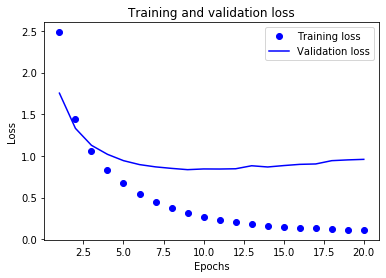

In [55]:
import matplotlib.pyplot as plt 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()


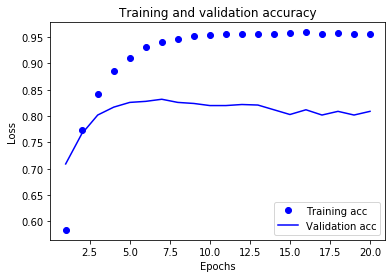

In [49]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

In [13]:
predictions = model.predict(x_test)

In [18]:
np.sum(predictions[0])

1.0

In [17]:
np.argmax(predictions[0])

3